## Cats vs. Dogs ##

In this project our objective will be distinguishing between images of cats and images of dogs.

Kaggle link: https://www.kaggle.com/competitions/dogs-vs-cats/overview

In [1]:
import cv2, os

We will use OpenCV to resize our images and OS to go over all the images in a given folder.

We will resize the images to the average size in order to cause minimum damage to the data. in addition to that, we will turn the images grayscale for ease of use later.

In [3]:
directories = [('C:\\Users\\royha\\Documents\\Uni\\SimData\\dogs-vs-cats\\test', 'C:\\Users\\royha\\Documents\\Uni\\SimData\\dogs-vs-cats\\test-resized'),
('C:\\Users\\royha\\Documents\\Uni\\SimData\\dogs-vs-cats\\train', 'C:\\Users\\royha\\Documents\\Uni\\SimData\\dogs-vs-cats\\train-resized')]

In [4]:
height = 0
width = 0
count = 0

for directory in directories:
    for filename in os.listdir(directory[0]):
        f = os.path.join(directory[0], filename)
        
        if os.path.isfile(f): # checking if it is a file
            image = cv2.imread(f)
            
            height += image.shape[0]
            width += image.shape[1]
            count += 1

avg_height = height/count
avg_width = width/count

In [9]:
size = (int(avg_height), int(avg_width))
size

(360, 404)

In [4]:

for filename in os.listdir(r'C:\Users\royha\Documents\Uni\SimData\cats-vs-dogs\train'):
    f = os.path.join(r'C:\Users\royha\Documents\Uni\SimData\cats-vs-dogs\train', filename)
    
    if os.path.isfile(f): # checking if it is a file
        image = cv2.imread(f)
        resized = cv2.resize(image, (100,100))
        gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

        save_f = os.path.join(r'C:\Users\royha\Documents\Uni\SimData\cats-vs-dogs\train-resized', filename)
        cv2.imwrite(save_f, gray)

### Clustering ###

In [1]:
from matplotlib.image import imread
image = imread(r"C:\Users\royha\Documents\Uni\SimData\cats-vs-dogs\clustering test\21.jpg")
image.shape

(404, 360)

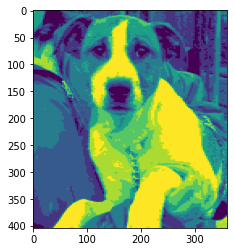

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

imgplot = plt.imshow(segmented_img)